In [1]:
from envelope_rafa_pkg import minterface

init
4.0


In [2]:
minterface.doit()

1

# read outputs
We should know how the library works when we use it, in this case our phase envelope library prints the results in a file named output.csv
we will use python loadtxt method to read it

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = np.loadtxt("output/output.csv", delimiter=",", dtype=bytes, 
                  skiprows=1 #skip first row because the heading is incomplete in the csv
                 ).astype(str)

#see first line
print(data[0,:])

#see last line
print(data[-1,:])

#record the identification flags in variables for posterior usage
idLiq = data[0,0]
idVap = data[-1,0]

[' Liq' '  0.50000000000000000      ' '   388.94726785159855      '
 '   4.5750739756748163E-002 ' '  0.95424926024325396      ' '']
[' Vap' '  0.50502988370684931      ' '   354.63531683611052      '
 '  0.85003996409913996      ' '  0.14996003590086018      ' '']


In [5]:
#keep column [0] in list as string, convert columns [1,2,3] to numpy array

numdata = (np.asarray((data[:,1:4]))).astype(np.float)

#see first line
print(numdata[0][:])

#see last line
print(numdata[-1][:])

# see that they are really understood as float
print(sum(sum(numdata))) #if they can be summed for example, they are really numbers

[5.00000000e-01 3.88947268e+02 4.57507398e-02]
[  0.50502988 354.63531684   0.85003996]
63609.65931680354


In [6]:
#split numdata into Pbub and Pdew according to the flags provided by the calculation program

Pbub = numdata[:,0][ np.where( data[:,0] == idLiq )]
Tbub = numdata[:,1][ np.where( data[:,0] == idLiq )]

Pdew = numdata[:,0][ np.where( data[:,0] == idVap )]
Tdew = numdata[:,1][ np.where( data[:,0] == idVap )]

#check
print(numdata[0:5,0])
print(data[0:5,0])
print(Pbub[0:5])

[0.5        0.55258546 0.61070138 0.6749294  0.74591235]
[' Liq' ' Liq' ' Liq' ' Liq' ' Liq']
[0.5        0.55258546 0.61070138 0.6749294  0.74591235]


# plot
we will use matplotlib tools, are in our lectures, to create plots with our output data.

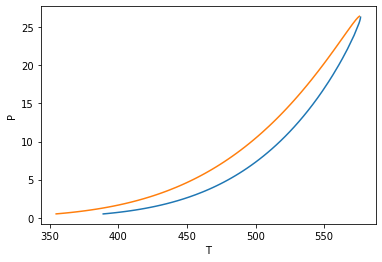

In [7]:
plt.plot(Tbub,Pbub)
plt.plot(Tdew,Pdew)

plt.xlabel('T') #use matplotlib's  mathtext to create special symbols in the x label
plt.ylabel('P') #y label for the second subplot

plt.show()

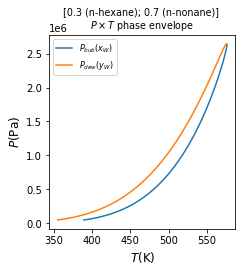

In [8]:
# GRAPHICAL ABSTRACT
from matplotlib import rcParams as rc

fig_width = 9 / 2.54 #in inches
fig_height = 9 / 2.54 #in inches
fig_size =  [fig_width,fig_height]

#FONTS & TICKS\n",
params = {
'axes.labelsize': 12,  #in pts
'font.size': 8, #in pts
'legend.fontsize': 8, #in pts
'xtick.labelsize': 10, #in pts
'ytick.labelsize': 10, #in pts,
'figure.figsize': fig_size}
rc.update(params)

GAfig, GAax1 = plt.subplots(1,1)

GAax1.plot(Tbub,Pbub*1e5)
GAax1.plot(Tdew,Pdew*1e5)


labels = [r'$P_{bub}(x_W)$', r'$P_{dew}(y_W)$']

plt.legend(labels, loc=2)

GAax1.set_title('[water; ethanol] \n LVE at ' + '351.55' + ' K')

GAax1.set_ylabel(r'$P(\mathrm{Pa})$')
GAax1.set_xlabel(r'$T(\mathrm{K})$')

GAax1.set_title('[0.3 (n-hexane); 0.7 (n-nonane)] \n' + r'$P \times T$' + ' phase envelope')

GAfig.subplots_adjust(left=0.17, right=0.9, top=0.9, bottom=0.14)

GAax1.ticklabel_format(style = 'sci', axis='y', scilimits=(0,0))

GAfig.savefig('fig4.png', dpi=1000)

plt.show()

#min em T aqui: http://www.ddbst.com/en/EED/VLE/VLE%20Acetone%3BWater.php



# conclusions
* python is capable of integration with libraries developed in other languages, as many legacy scientific and engineering routines in fortran or c, or contemporary routines developed in these languages with special care for high performace computing in their own field, as some computational fluid dynamics or molecular simulation codes.

# credits
* Core developed by Rafael Pereira
* Build procedure and python bindings by Iuri Segtovich using (pip, setuptools, mingw, anaconda, f2py)